# CSc 74020 Machine Learning Week 4: Logistic Regression and Regularization

**Big thank you to Professor Liang Zhao for much of the material in this workbook**

## 1. <font color='blue'>Binary Classification Models</font>

### <font color='blue' >Binary Classifier</font>
- For the following let X represent a row vector of features / random variables (not the desing matrix)
- The response variable $Y$ gives one of two categories (denoted as 0 and 1).
- Rather than modeling $Y$ directly, we plan to model the probability that $Y$ belongs to a particular category: $Pr(Y=0|X=x)$ and $Pr(Y=1|X=x)$.
- Once the probabilities are predicted, one can determine a threshold ($T$) for predicting the class.  
$$
\left\{
\begin{array}{cc}
Pr(Y=1|X=x)\ge T & \textit{ predict }\hat{Y} = 1\\
Pr(Y=0|X=x)< T & \textit{predict }\hat{Y} = 0
\end{array}
\right.
$$
- $T=.5$ is the standard value, but other can be choosen based on impact of True Positives (TP), FP, TN, and FN.
- Moreover you could set different thresholds for each class and create an area where the model does not create a predicted class.

By definition, if we know the joint distribution of $X$ and $Y$, then the probability can be computed as
$$Pr(Y=1|X=x) = E\big[Y | X=x\big]$$
However, we most likely do not know the exact joint distribution.

The **logistic regression model** has the form
$$ln\left(\frac{p(X)}{1-p(X)}\right) = \beta_0 + \sum_{j=1}^kX_j\beta_j = X^{T}\beta\ (design\ matrix\ notation)$$
By applying logistic model, we assume that log-odds ratio can be reasonably approximated by linear functions

### <font color='blue'>Why Logistic?</font>
- Simplicity
- Interpretability - $\beta$ is expected change in log odds with 1 unit change in the feature
- Deep understanding
- Can expand its scope to form other methods (regularization, credibility estimates, etc.)

Logistic models are especially useful with
- linear relationship to log-odds is expected / desired
- small numbers of training cases
- noisy data
- sparse data
- linear extrapolation of log odds is desired

## 2. <font color='blue'>Deeper dive: Logistic Regression </font>

Let's rewrite our logist regression model as follows
$$p(x) = Pr(Y=1|X=x) = \frac{e^{\beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p}}{1 + e^{\beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p}} = \frac{e^{X\beta}}{1 + e^{X\beta}} = \sigma(\langle \beta, X \rangle)$$

$\beta_0$ is referred to as the **intercept or bias** and $\beta_i$ are the **weights or coefficeints**.

Another way to write our equations is the definition of **Sigmoid** function. $\sigma(\langle w, X \rangle)$. First define (if $X, w$ are column vectors)

$$ \langle w, X \rangle :=  w^T X  $$

then

$$ P( y=1 \; \big| \; X, \, w) = \dfrac{1}{1 + e^{- \langle w, X \rangle}} = \sigma(\langle w, X \rangle)$$

In logistic regression the optimal parameters $w$ are found by cross-entropy minimization:

$$ L(w) =  - {1 \over \ell} \sum_{i=1}^\ell \left[ {y_i \cdot log P(y_i \, | \, X_i,w) + (1-y_i) \cdot log (1-P(y_i\, | \, X_i,w))}\right] $$

where $X_i$ is the individual row / observation.

\

**From last week: How does this relate to maximum liklihood?**

\

**Here I am mixing up notation a bit partially on purpose (and for simplicity) so you get comfortable with different notations**

### <font color='blue' >Convex Function (Univariate)</font>
A function $f:\mathbb{R}\rightarrow\mathbb{R}$ is called **convex** if
$$\forall x_1, x_2\in\mathbb{R}, \forall t\in[0, 1], tf(x_1) + (1-t)f(x_2) \ge f(tx_1 + (1-t)x_2)$$
or geometrically
- the **line segment** between any **two points on the graph** of the function lies **above or on** the graph.
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/ConvexFunction.svg/1280px-ConvexFunction.svg.png width="600">

Examples of convex functions:
- $x^2, x^4, x^6, ...$
- $e^x$
- $-\log x$
- $-\sqrt{x}$
- $x, -x, |x|$

$f(x)$ is called a **concave** function if $-f(x)$ is convex.

### <font color='blue' >Convex Functions (Multivariate)</font>
A function $f:\mathbb{R}^p\rightarrow\mathbb{R}$ is called **convex** if
$$\forall x_1, x_2\in\mathbb{R}^p, \forall t\in[0, 1], tf(x_1) + (1-t)f(x_2) \ge f(tx_1 + (1-t)x_2)$$
or geometrically
- the **line segment** between any **two points on the graph** of the function lies **above or on** the graph.
<img src=https://upload.wikimedia.org/wikipedia/commons/6/6e/Grafico_3d_x2%2Bxy%2By2.png width="600">

- **Determine convexity via second derivative**.
  - A twice differentiable univariate function $f(x)$ is convex if and only if $f''(x) \ge 0$ for all $x$.
  - A twice differentiable multivariate function $f(x)$ is convex if and only if its **Hessian matrix** of second partial derivatives is **positive semi-definite** for all $x$.


> A symmetric matrix $\textbf{M}$ is **positive semi-definite** if:
>- $\textbf{x}^T\textbf{M}\textbf{x} \ge 0$ for all $\textbf{x}$.

> **or equivalently**
>- All eigenvalues of $\textbf{M}$ are positive or zero.

- **Global minimum**.
    - If a univariate function $f(x)$ is convex and $f'(c)=0$, then $c$ is the global minimum of $f$.
    - If a multivariate function $f(x)$ is convex and $f'(c)=0$, then $c$ is the global minimum of $f$.
- **Operations that preserves convexity**:
    - non-negative weighted sum of convex functions.
    - compositioin of two convex functions
- **Jensen's inequality**. If $X$ is a random variable and $f$ is a convex function, then $E[f(x)] \ge f(E[X])$.
**Exercise:** Show that $f(x) = ln(1 + e^x)$ is convex.

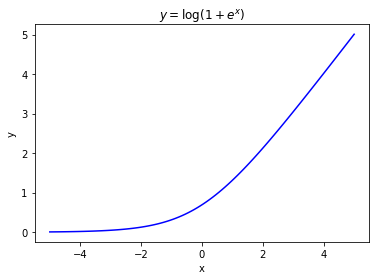

In [ ]:
x_coordinates = np.linspace(-5, 5, 100)
y_coordinates = np.log(1 + np.exp(x_coordinates))
plt.plot(x_coordinates, y_coordinates, 'b-')
plt.title(r"$y = \log(1 + e^x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### <font color='blue' >The Convexity of $\ell(\beta)$</font>
From a log-likelihood viewpoint
$$\begin{align}
\ell(\hat{\beta}) =& -\log L(\hat{\beta}) \\
=& -\sum_{(x_i, y_i)\\y_i=1}\log p(x_i) - \sum_{(x_i, y_i)\\y_i=0}\log (1 - p(x_i)) \\
=& -\sum_{i=1}^N\big[y_i\log p(x_i) + (1-y_i)\log(1 - p(x_i))\big]\\
=& -\sum_{i=1}^N\big[y_ix_i^T\beta - \log(1 + e^{x_i^T\beta})\big]
\end{align}$$

But same applies from cross-entropy view


### <font color='blue' >The Convexity Proof</font>
- $x_i^T\beta$ is a convex function for all $i$.
- $-x_i^T\beta$ is also a convex function for all $i$.
- $\log(1 + e^{x_i^T\beta})$ is the composition of $x_i^T\beta$ and $\log(1+e^x)$, so it is also a convex function.
- $\ell(\beta)$ is the sum of functions $-x_i^T\beta$ and $\log(1 + e^{x_i^T\beta})$ with coefficient $y_i$ and $+1$, and therefore is a convex function, too.

### <font color='blue' >Gradient Descent</font>
**Gradient descent** is an iterative algorithm for finding the **local minimum** of a differentiable function.
- Choose an initial value of $\beta = \hat{\beta}_0$ and a **learning rate** $r$.
- For each iteration $k$, do:
$$\hat{\beta}_{k+1} = \hat{\beta}_k - r\cdot\frac{\partial \ell}{\partial \beta}(\hat{\beta}_k)$$

- End iteration if certain stop criteria is reached, such as:
    - Value of $\hat{\beta}$ becomes stable.
    - Certain iteration amount is reached.
    - Perfomance on validation gets worse or stops improving (see [Early Stopping](https://en.wikipedia.org/wiki/Early_stopping))

[Paperspace wiki](https://machine-learning.paperspace.com/wiki/gradient-descent) and [wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)
<tr>
<td> <img src="https://1394217531-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvHdp4dUnLltlIB6QRX%2F-LvHmoeDavPzU-wiLw_a%2Fimage.png?alt=media&token=9132d4aa-bde6-4c1b-8656-9b5f65d5c658">Source: O'Reilly Media

**Note:** Learning rate does not need to be constant. See [Learning Rate Scheduling](https://d2l.ai/chapter_optimization/lr-scheduler.html)


## 2. <font color='blue'>Example: Credit Card Default </font>
- Data exploration
- Model training
- Model evaluation
- Model deployment
- Model maintenance

#### <font color='blue'>Plotting Functions </font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

def plot_linear_vs_logistic(df):
    X_train = df.balance.values.reshape(-1,1)
    y = df.default

    # Create array of test data. Calculate the classification probability
    # and predicted classification.
    X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    # Left plot
    model_lr = LinearRegression()
    model_lr.fit(X_train, y)
    predictions = model_lr.predict(X_test)
    ax1.scatter(X_train, y, color='orange')
    ax1.plot(X_test, predictions, color='blue')

    # Right plot
    clf = LogisticRegression(solver='newton-cg')
    clf.fit(X_train, y)
    prob = clf.predict_proba(X_test)
    ax2.scatter(X_train, y, color='orange')
    ax2.plot(X_test, prob[:,1], color='blue')

    for ax in fig.axes:
        ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
                xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
        ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
                xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
        ax.set_ylabel('Probability of default')
        ax.set_xlabel('Balance')
        ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
        ax.set_xlim(xmin=-100)
    plt.show()

def plot_decision_boundary(model, data):
    x_lower = data['balance'].min()
    x_upper = data['balance'].max()
    y_lower = data['income'].min()
    y_upper = data['income'].max()
    xs = np.linspace(x_lower, x_upper, 200)
    ys = np.linspace(y_lower, y_upper, 200)
    xx, yy = np.meshgrid(xs, ys)
    zz = model.predict(np.hstack([xx.reshape([-1, 1]), yy.reshape([-1, 1])]))
    plt.scatter(data[['balance']], data[['income']], c=data[['default']].values, cmap=matplotlib.cm.cool, alpha=0.2)
    plt.scatter(xx.reshape([-1, 1]), yy.reshape([-1, 1]), c=zz.reshape([-1, 1]), cmap=matplotlib.cm.cool, s=5, alpha=0.03)
    plt.xlabel('Balance')
    plt.ylabel('Income')
    # plt.legend()
    plt.show()

In [ ]:
url = "https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Data/Default.xlsx?raw=true"
df = pd.read_excel(url, index_col=0)
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [ ]:
# Convert Yes and No to 1 and 0.
def convert_yes_no(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    else:
        return x

df['default'] = df['default'].apply(convert_yes_no)
df['student'] = df['student'].apply(convert_yes_no)
df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 390.6 KB


In [ ]:
print(df[['default']].value_counts())
print(df[['student']].value_counts())
df.describe()

default
0          9667
1           333
dtype: int64
student
0          7056
1          2944
dtype: int64


,default,student,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876
std,0.179428,0.455795,483.714985,13336.639563
min,0.000000,0.000000,0.000000,771.967729
25%,0.000000,0.000000,481.731105,21340.462903
50%,0.000000,0.000000,823.636973,34552.644802
75%,0.000000,1.000000,1166.308386,43807.729272
max,1.000000,1.000000,2654.322576,73554.233495


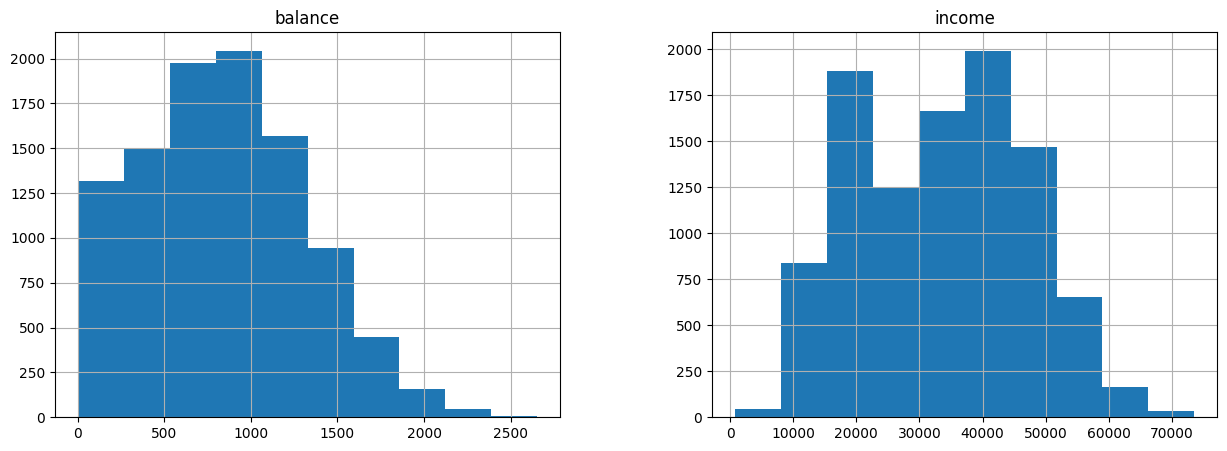

In [ ]:
df[['balance', 'income']].hist(figsize=(15, 5))
plt.show()

In [ ]:
df[df.default == 1]

,default,student,balance,income
137,1,1,1486.998122,17854.397028
174,1,1,2205.799521,14271.492253
202,1,1,1774.694223,20359.506086
207,1,0,1889.599190,48956.171589
210,1,1,1899.390626,20655.200003
...,...,...,...,...
9913,1,0,2148.898454,44309.917173
9922,1,1,1627.898323,17546.997016
9950,1,0,1750.253150,51578.940163
9952,1,0,1515.606239,48688.512086


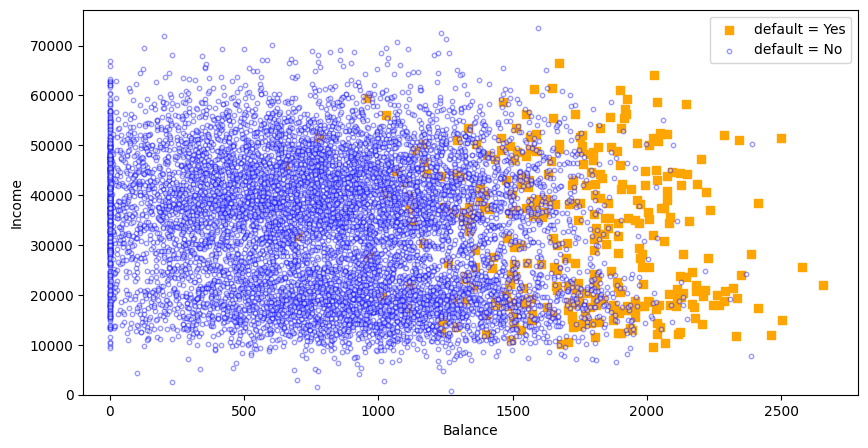

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df[df.default == 1].balance, df[df.default == 1].income, s=40, c='orange', marker='s',
            linewidths=1, label="default = Yes")
plt.scatter(df[df.default == 0].balance, df[df.default == 0].income, s=40, marker='.', linewidths=1,
            edgecolors='blue', facecolors='white', alpha=.4, label="default = No")
plt.ylim(ymin=0)
plt.ylabel('Income')
plt.xlim(xmin=-100)
plt.xlabel('Balance')
plt.legend()
plt.show()

In [ ]:
df

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879
...,...,...,...,...
9996,0,0,711.555020,52992.378914
9997,0,0,757.962918,19660.721768
9998,0,0,845.411989,58636.156984
9999,0,0,1569.009053,36669.112365


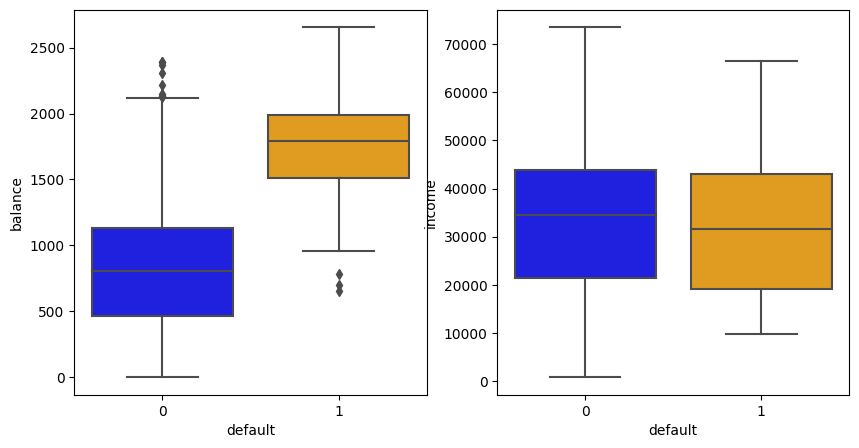

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10,5))

c_palette = {0:'blue', 1:'orange'}
sns.boxplot(x='default', y='balance', data=df, orient='v', ax=axes[0], palette=c_palette)
sns.boxplot(x='default', y='income', data=df, orient='v', ax=axes[1], palette=c_palette)
plt.show()

#### <font color='blue'>Basic Modeling </font>

In [ ]:
# Use sklearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none', max_iter=1000)
#clf = LogisticRegression(penalty='none', solver='newton-cg', max_iter=1000)
#clf = LogisticRegression(penalty='none', solver='saga', max_iter=1000)
clf.fit(df[['balance', 'income', 'student']],df['default'])
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=1000, penalty='none')
classes:  [0 1]
coefficients:  [[ 4.16320944e-03 -1.34958487e-04 -3.97984710e+00]]
intercept : [-3.01893511]


In [ ]:
# Use statsmodel
import statsmodels.formula.api as smf
f = 'default ~ balance + income + student'
est = smf.logit(formula = f, data = df).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


Now we are stuck - which if correct? 3 options
1.   Determine which is theoretically correct
2.   Determine which minimized the in-sample loss better
3.   Empirically determine which is better

Ideally both, but let's focus on the 3rd

#### <font color='blue'>Model Evaluation </font>
- Split the whole data set into training set (80%) and test set (20%)
- Use only the training set to train the model
- Use the model to make predictions on the test set
- A good model should achieve high classification accuracy on the test set

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)
print("Training set:", df_train.shape)
print("Test set:", df_test.shape)

Training set: (8000, 4)
Test set: (2000, 4)


In [ ]:
df_test[df_test['default'] == 1].shape

(67, 4)

In [ ]:
# sklearn
model_sklearn = LogisticRegression(penalty='none')
input_cols = ['balance', 'student', 'income']
model_sklearn.fit(df_train[input_cols], df_train['default'])
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

coefficients:  [[ 4.16320944e-03 -1.34958487e-04 -3.97984710e+00]]
intercept : [-3.01893511]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
df_test = df_test.copy()
df_test['sklearn_prediction'] = model_sklearn.predict(df_test[input_cols])
df_test.head()

,default,student,balance,income,sklearn_prediction
6668,0,0,391.482079,45821.633228,0
6601,0,1,1156.620200,11102.568146,0
707,0,0,1448.835465,33835.736256,0
8808,0,0,307.730563,48123.551049,0
7169,0,1,1051.425965,6583.874438,0


In [ ]:
# statsmodels
f = 'default ~ balance + student + income'
est = smf.logit(formula = f, data = df_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.075498
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-11.587608,0.580371,-19.965874,1.091027e-88,-12.725114,-10.450102
balance,0.006092,0.000278,21.945215,9.621143e-107,0.005548,0.006636
student,-0.641402,0.269550,-2.379534,1.733453e-02,-1.169710,-0.113095
income,0.000008,0.000009,0.877850,3.800251e-01,-0.000010,0.000026


In [ ]:
df_test['statsmodel_prediction'] = est.predict(df_test[input_cols])
df_test['statsmodel_prediction'] = (df_test['statsmodel_prediction'] > 0.5).astype(int)
df_test.head()

,default,student,balance,income,sklearn_prediction,statsmodel_prediction
6668,0,0,391.482079,45821.633228,0,0
6601,0,1,1156.620200,11102.568146,0,0
707,0,0,1448.835465,33835.736256,0,0
8808,0,0,307.730563,48123.551049,0,0
7169,0,1,1051.425965,6583.874438,0,0


In [ ]:
from sklearn.metrics import accuracy_score
print("Sklearn:", accuracy_score(df_test['default'], df_test['sklearn_prediction']))
print("Statsmodel:", accuracy_score(df_test['default'], df_test['statsmodel_prediction']))

Sklearn: 0.967
Statsmodel: 0.969


In [ ]:
df_test['different_prediction'] = (df_test['sklearn_prediction'] != df_test['statsmodel_prediction'])
df_test['different_prediction'].value_counts()

False    1964
True       36
Name: different_prediction, dtype: int64

In [ ]:
df_test[df_test['different_prediction']].sort_values(by='default')

,default,student,balance,income,sklearn_prediction,statsmodel_prediction,different_prediction
8455,0,0,1856.530876,33498.834520,1,0,True
735,0,1,2004.727568,27136.537977,0,1,True
3858,0,1,2118.800574,18791.852084,0,1,True
3203,0,0,1823.231922,24744.854056,1,0,True
5492,0,0,2096.136391,49992.529814,0,1,True
716,0,0,1442.129805,10921.615028,1,0,True
3703,0,1,2370.463612,24251.958722,0,1,True
3787,0,0,1768.139978,30762.105214,1,0,True
1112,0,1,1994.049188,14305.111466,0,1,True
751,0,0,1202.883124,12288.127075,1,0,True


## 5. <font color='blue'>Practical Consideration: Imbalanced Data </font>

**What happens when your data is imbalanced? E.g. More 0's than 1's**
- How imbalanced is it? 10:1 vs 10000:1
- When we need to be careful? which algoriothm / loss function / optimization techniques?
- What performance metrics are misleading?
- What is the desired outcome? Precision vs recall etc.

\

**Let's mentions a few ways to address**
- Can you get more data for underrepresented class?
- Under or oversampling
- ALWAYS EXPERIMENT / TRY DIFFERENT APPROACHES
- Is anomaly detection a better approach?
- Two-stage modeling
- Algorithms designed for such data$^1$ (no guarantees)
- Many more

\

**Main message here is ALWAYS try to test out of sample as there is not one best solution. Ideally specify required performance ahead of time**

\

See$^1$: https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html

## 5. <font color='blue'>Beyond Binary: Multiclass </font>

**Softmax**

$$ \sigma_{i}(W, X ) := P( y=i \; \big| \; X, \, W)=p_i=\frac{e^{\langle w_i,X \rangle}}{\sum e^{\langle w_k,X \rangle}} $$


**Cross Entropy Loss**
$$ \begin{align}
L &= - \sum_i y_i log(p_i) \\
\frac{\partial L}{\partial \sigma_i} &= - \sum_k y_k \frac{\partial log(p_k)}{\partial \sigma_i } \\
&= - \sum_k y_k \frac{\partial log(p_k)}{\partial p_k} \times \frac{\partial p_k}{ \partial \sigma_i} \\
&= - \sum y_k \frac{1}{p_k} \times \frac{\partial p_k}{\partial \sigma_i} \\
\end{align} $$

#### <font color='blue'>Multi-Class Logistic Regression </font>
- **One vs. One**: Build a binary logistic classifier for each pair of classes, and pick the most frequently chosen class. This method requires building $n(n-1)/2$ models for $n$ classes, and thus it is very slow when $n$ is large.
- **One vs. All (One vs. Rest)**: Build a binary classifier for each class, and pick the class with largest probability. This method requires building $n$ models for $n$ classes.
- **Softmax Regression**: Build a single model that predicts the probability for each class.
    - Model Assumption: For $k=1,...,n$,
    $$
Pr(Y=k|X=x) = \frac{e^{X^T\beta^{(k)}}}{\sum_{l=1}^n e^{X^T\beta^{(l)}}}
    $$
    Here $\beta^{(1)}, ..., \beta^{(n)}\in\mathbb{R}^p$ are model parameters.
    - Cost function:
$$
\ell(\beta) = -\sum_{i=1}^N\log(Pr(Y=y_i|X=x_i))
$$
    - The cost function is a convex function, so gradient descent method guarantees to find its global minimum.